In [1]:
# Part 1: KNN Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
file_path = '/Users/architbarua/Documents/ALY 6020/letters.csv'  # Replace this with your file path
data = pd.read_csv(file_path)

In [3]:
# Split the data into features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# Predict the labels for the testing set and calculate accuracy
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'KNN Model Accuracy: {accuracy_knn*100:.2f}%')


KNN Model Accuracy: 62.70%


In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [9]:
# Preprocess the data for the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


In [11]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Train the model on the scaled training data
model.fit(X_train_scaled, y_train_categorical, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
840/840 [==============================] - 1s 484us/step - loss: 1.2323 - accuracy: 0.5685 - val_loss: 1.0330 - val_accuracy: 0.6394
Epoch 2/10
840/840 [==============================] - 0s 422us/step - loss: 0.9848 - accuracy: 0.6445 - val_loss: 0.9643 - val_accuracy: 0.6446
Epoch 3/10
840/840 [==============================] - 0s 422us/step - loss: 0.9367 - accuracy: 0.6612 - val_loss: 0.9352 - val_accuracy: 0.6689
Epoch 4/10
840/840 [==============================] - 0s 426us/step - loss: 0.9122 - accuracy: 0.6698 - val_loss: 0.9276 - val_accuracy: 0.6728
Epoch 5/10
840/840 [==============================] - 0s 426us/step - loss: 0.8917 - accuracy: 0.6764 - val_loss: 0.9184 - val_accuracy: 0.6754
Epoch 6/10
840/840 [==============================] - 0s 426us/step - loss: 0.8794 - accuracy: 0.6793 - val_loss: 0.9028 - val_accuracy: 0.6760
Epoch 7/10
840/840 [==============================] - 0s 483us/step - loss: 0.8671 - accuracy: 0.6851 - val_loss: 0.8910 - val_accuracy:

In [15]:
 # Evaluate the model on the scaled testing data
loss, accuracy_nn = model.evaluate(X_test_scaled, y_test_categorical)
print(f'Neural Network Test Accuracy: {accuracy_nn*100:.2f}%')

263/263 [==============================] - 0s 256us/step - loss: 0.8834 - accuracy: 0.6912
Neural Network Test Accuracy: 69.12%


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
def evaluate_model(y_test, y_pred, model_name):
    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy*100:.2f}%\n")


Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       861
           1       0.76      0.95      0.84       971
           2       0.57      0.63      0.60       817
           3       0.51      0.53      0.52       834
           4       0.55      0.54      0.54       802
           5       0.59      0.54      0.57       744
           6       0.85      0.86      0.86       821
           7       0.47      0.46      0.47       914
           8       0.60      0.45      0.51       789
           9       0.46      0.38      0.42       847

    accuracy                           0.63      8400
   macro avg       0.62      0.62      0.62      8400
weighted avg       0.62      0.63      0.62      8400



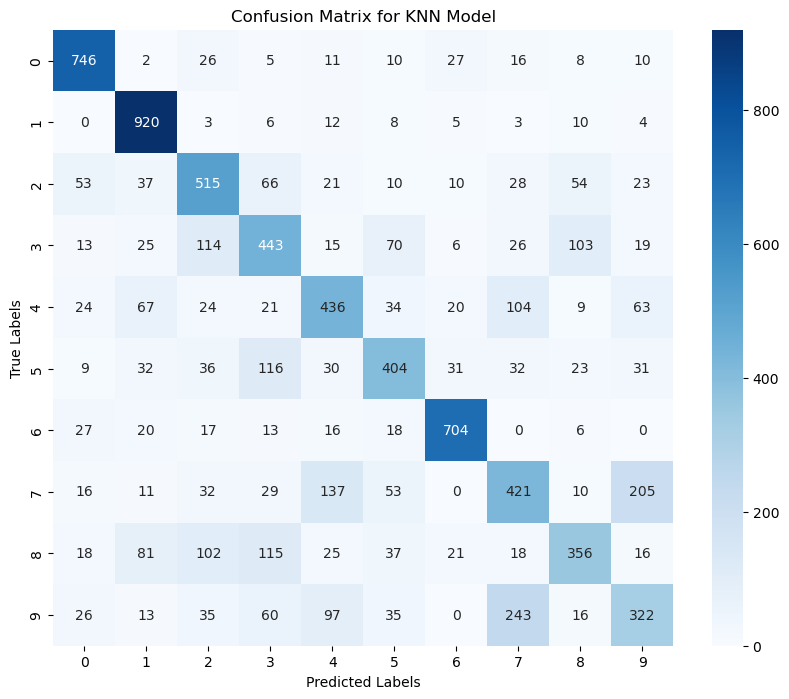

Accuracy for KNN Model: 62.70%



In [18]:
evaluate_model(y_test, y_pred, "KNN Model")


263/263 [==============================] - 0s 232us/step
Classification Report for Neural Network Model:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       861
           1       0.83      0.95      0.88       971
           2       0.69      0.65      0.67       817
           3       0.65      0.60      0.62       834
           4       0.72      0.57      0.64       802
           5       0.66      0.61      0.63       744
           6       0.89      0.87      0.88       821
           7       0.52      0.63      0.57       914
           8       0.69      0.53      0.60       789
           9       0.46      0.54      0.50       847

    accuracy                           0.69      8400
   macro avg       0.70      0.69      0.69      8400
weighted avg       0.70      0.69      0.69      8400



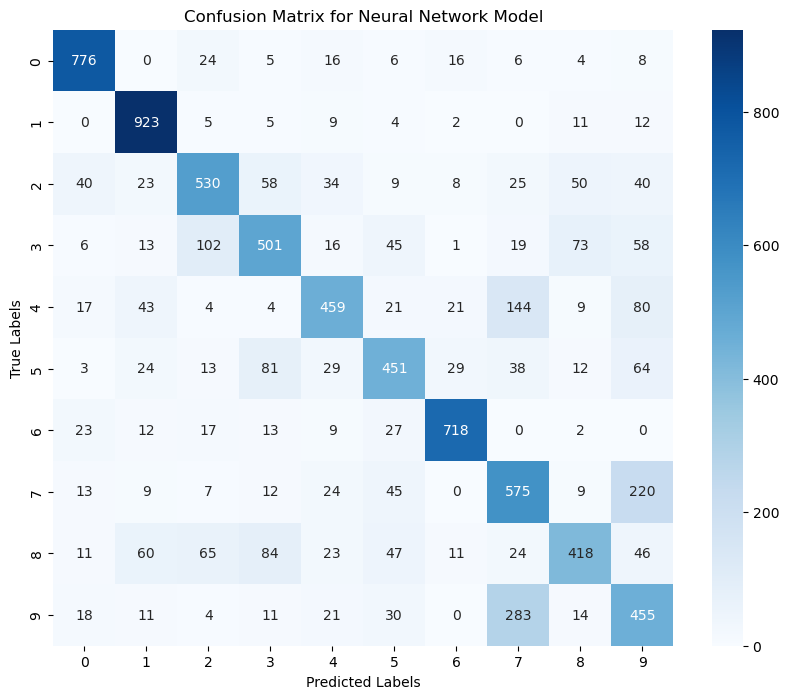

Accuracy for Neural Network Model: 69.12%



In [19]:
# Convert predictions from one-hot encoded format to class labels
y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=1)

# Evaluate the Neural Network model
evaluate_model(y_test, y_pred_nn, "Neural Network Model")
